In [1]:
import cv2 

img = cv2.imread('C:\\Users\\jorge\\OneDrive\\Escritorio\\IA\\Imagenes\\sportimages\\basket\\basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

21 28 3 3


# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\jorge\\OneDrive\\Escritorio\\IA\\Imagenes\\sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\americano 1
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\basket 9348
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\beisball 8823
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\boxeo 7752
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\ciclismo 7125
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\f1 7533
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\futbol 5053
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\golf 7617
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\natacion 9768
C:\Users\jorge\OneDrive\Escritorio\IA\Imagenes\sportimages\tenis 5172
Directorios leidos: 10
Imagenes en cada directorio [9349, 8823, 7752, 7125, 7533, 5053, 7617, 9768, 5172, 8936]
suma Total de imagenes en subdirs: 77128


/home/likcos/DataSets/sportimages/sportimages/natacion 9348


/home/likcos/DataSets/sportimages/sportimages/futbol 5172


/home/likcos/DataSets/sportimages/sportimages/beisball 7617


/home/likcos/DataSets/sportimages/sportimages/f1 7752


/home/likcos/DataSets/sportimages/sportimages/ciclismo 5053


/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  77128


In [6]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 americano
1 basket
2 beisball
3 boxeo
4 ciclismo
5 f1
6 futbol
7 golf
8 natacion
9 tenis


In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 6')

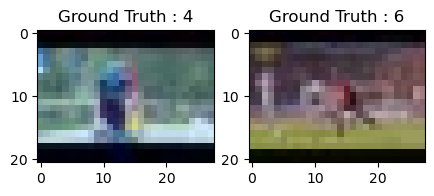

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

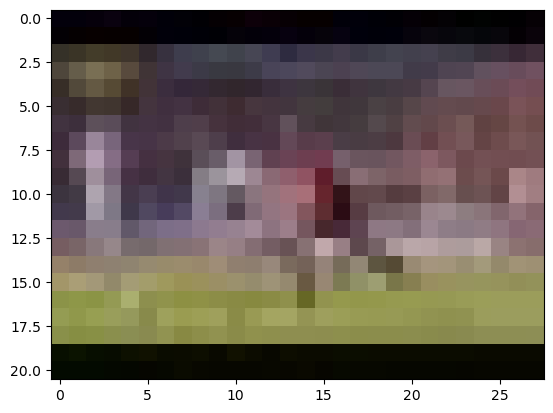

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [16]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

In [17]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


772/772 [==============================] - 11s 13ms/step - loss: 2.2422 - accuracy: 0.1475 - val_loss: 2.1267 - val_accuracy: 0.3144
Epoch 2/20
772/772 [==============================] - 8s 11ms/step - loss: 2.0992 - accuracy: 0.2433 - val_loss: 1.9208 - val_accuracy: 0.4611
Epoch 3/20
772/772 [==============================] - 9s 11ms/step - loss: 1.9339 - accuracy: 0.3163 - val_loss: 1.6993 - val_accuracy: 0.5428
Epoch 4/20
772/772 [==============================] - 9s 11ms/step - loss: 1.7806 - accuracy: 0.3757 - val_loss: 1.5187 - val_accuracy: 0.5981
Epoch 5/20
772/772 [==============================] - 8s 11ms/step - loss: 1.6506 - accuracy: 0.4297 - val_loss: 1.3694 - val_accuracy: 0.6461
Epoch 6/20
772/772 [==============================] - 9s 11ms/step - loss: 1.5392 - accuracy: 0.4721 - val_loss: 1.2521 - val_accuracy: 0.6687
Epoch 7/20
772/772 [==============================] - 9s 11ms/step - loss: 1.4368 - accuracy: 0.5108 - val_loss: 1.1516 - val_accuracy: 0.6

In [19]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("C:\\Users\\jorge\\OneDrive\\Escritorio\\IA\\Imagenes\\sportimages\\sport.h5")

C:\Users\jorge\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluamos la red

In [20]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 [==============================] - 2s 4ms/step - loss: 0.6705 - accuracy: 0.8284


In [21]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6705453395843506
Test accuracy: 0.828406572341919


In [22]:
sport_train.history

{'loss': [2.2421951293945312,
  2.09916090965271,
  1.9338799715042114,
  1.7806135416030884,
  1.65058434009552,
  1.5392253398895264,
  1.4368470907211304,
  1.3629390001296997,
  1.2906441688537598,
  1.2373985052108765,
  1.1841593980789185,
  1.141129732131958,
  1.0991668701171875,
  1.0678443908691406,
  1.042920470237732,
  1.0079420804977417,
  0.9846620559692383,
  0.9617982506752014,
  0.9402139186859131,
  0.919182300567627],
 'accuracy': [0.1474646031856537,
  0.24326898157596588,
  0.3163023293018341,
  0.3756609559059143,
  0.42973196506500244,
  0.47205284237861633,
  0.5107676386833191,
  0.5372662544250488,
  0.5609286427497864,
  0.5782095193862915,
  0.598792552947998,
  0.6154859066009521,
  0.6287757754325867,
  0.6424302458763123,
  0.6510807871818542,
  0.6655457019805908,
  0.673365592956543,
  0.6849536895751953,
  0.691416323184967,
  0.7010190486907959],
 'val_loss': [2.126715660095215,
  1.9207526445388794,
  1.6993430852890015,
  1.5187004804611206,
  1.36

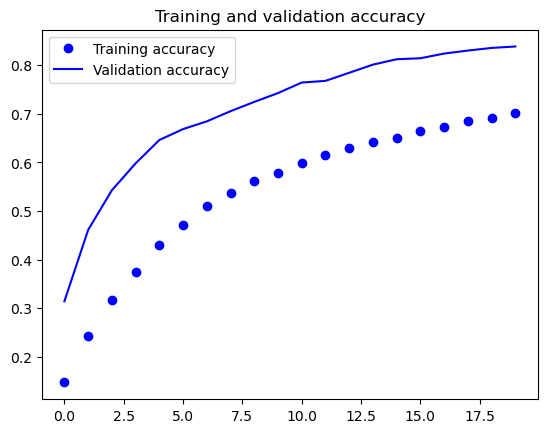

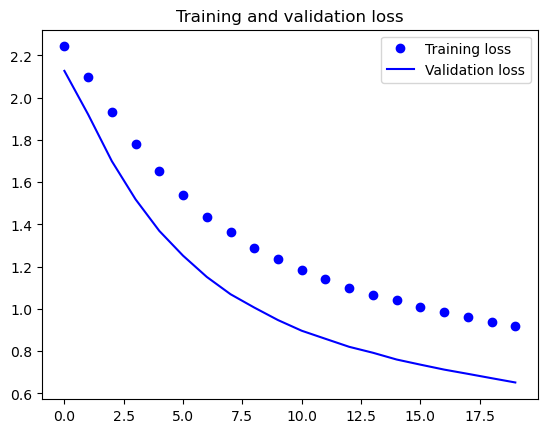

In [23]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes2 = sport_model.predict(test_X)

483/483 [==============================] - 2s 4ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [26]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 12779 correct labels


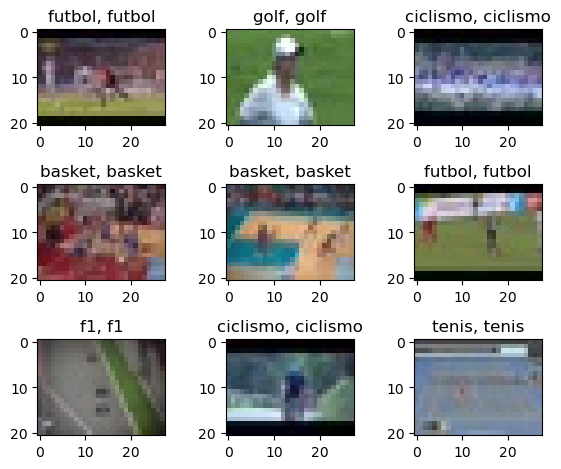

In [27]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 2647 incorrect labels


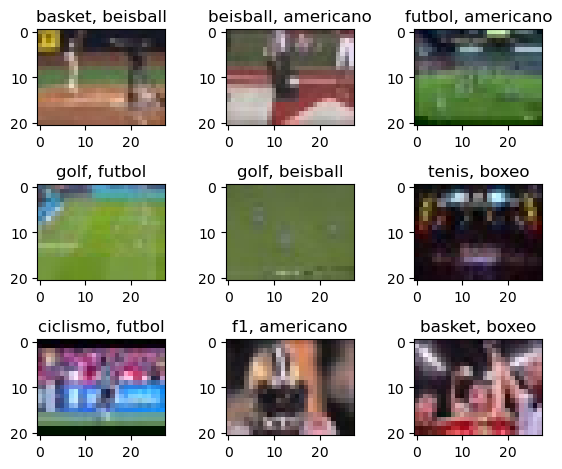

In [29]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.72      0.54      0.61      1854
     Class 1       0.85      0.87      0.86      1826
     Class 2       0.77      0.75      0.76      1574
     Class 3       0.87      0.91      0.89      1462
     Class 4       0.95      0.99      0.97      1463
     Class 5       0.72      0.56      0.63      1018
     Class 6       0.90      0.81      0.86      1552
     Class 7       0.67      0.90      0.77      1986
     Class 8       0.93      0.93      0.93       964
     Class 9       0.97      1.00      0.98      1727

    accuracy                           0.83     15426
   macro avg       0.83      0.83      0.83     15426
weighted avg       0.83      0.83      0.82     15426



In [31]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:\\Users\\jorge\\OneDrive\\Escritorio\\UNIVERSIDAD\\9no-Semestre\\IA\\Inteligencia-Artificial\\Imagenes\\sportimages\\']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jorge\\OneDrive\\Escritorio\\UNIVERSIDAD\\9no-Semestre\\IA\\Inteligencia-Artificial\\Imagenes\\sportimages\\'

In [ ]:
import numpy as np
import cv2 as cv
import math 
 
cap = cv.VideoCapture("/home/likcos/Vídeos/rosas.mp4")
i=0
while True:
    ret, frame = cap.read()
    cv.imshow('img', frame)
    k = cv.waitKey(1)
    #if k == ord('a'):
    i=i+1    
    cv.imwrite('/home/likcos/datasetcubre/data'+str(i)+'.jpg', frame )
    if k == 27:
        break
cap.release()
cv.destroyAllWindows()